# Applied Information Analyst Series 
### A1: The illusion of immeasurability
##### Febuary 20th, 2018

In [1]:
import numpy as np
import seaborn as sns
import pymc3 as pm
%matplotlib inline

Q: Why wouldn't we want to measure something?
A: If the cost of the measurement exceeds the value of the information

### So what is measurement?
The reduction of uncertainty.  The amount of reduciton corresponds to the value of that measurement. The key thing, in this framework we must consistantly think of outcomes in terms of probability distribuiton. 

### 5 Sample Trick
If you want to predict the median of a distribuiton, then with a sample of 5 you can be 93.5% that the median is contained between the minimum and the maximum of the sample.  This rule can actually be generalized based on the number of samples.  You can also how many samples from the max you look at.  So for 23 samples, we can look the 8th values from the min and max and still have ~93% confidence that the median is in that range.  ~~I would love to simulate this directly.~~ Modeled!  Have fun playing below!

In [2]:
from utils.population import Population
population = Population(50, 20)

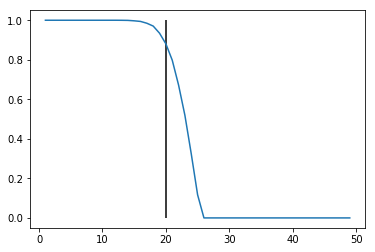

For a sample size of 50, you can use the 20 values
from the min/max and still have 88.050% confidence
that the median is between those values.


In [110]:
population.plot_ixs(sample_size=50, ix_high=50)

(0, 0.1)

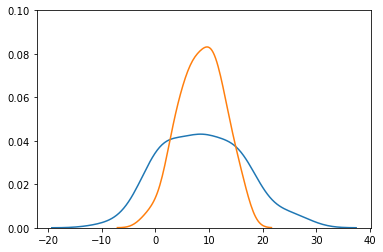

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.random.normal(loc=10, scale=8, size=100)
y = np.random.normal(loc=9.5, scale=4, size=100)
sns.kdeplot(x, ax=ax)
sns.kdeplot(y, ax=ax)
ax.set_ylim(0, 0.1)

In [5]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from ipywidgets import interact
output_notebook()

Loading BokehJS ...

In [8]:
x = range(1, 5)
y = population.get_prob_for_ixs(sample_size=5, ix_high=5)

In [9]:
p = figure()
r = p.line(x, y)

In [105]:
@interact(sample_size=(1, 1000), continuous_update=False)
def update(sample_size=5):
    r.data_source.data = {'x': range(1, sample_size), 
                          'y': population.get_prob_for_ixs(sample_size=sample_size, 
                                                          ix_high=sample_size,
                                                          ix_low=1)}
    show(p, notebook_handle=True)

interactive(children=(IntSlider(value=5, description='sample_size', max=1000, min=1), Output()), _dom_classes=('widget-interact',))